In [1]:
# Basic imports
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

%matplotlib inline

# Data Preprocessing


## Load Cifar10 Dataset

In [2]:
# Setting class names
class_names = ['airplane','automobile','bird','cat',\
               'deer','dog','frog','horse','ship','truck']

In [3]:
# Load the Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Image Normalization

In [4]:
# Divide by 255 because it is the highest value a pixel can have
X_train = X_train / 255
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test = X_test / 255
X_test.shape

(10000, 32, 32, 3)

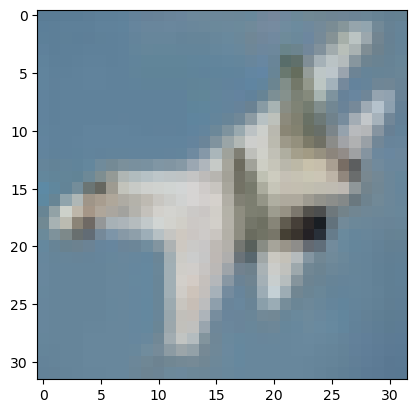

In [6]:
# Show 11th Image of Test set
plt.imshow(X_test[10])

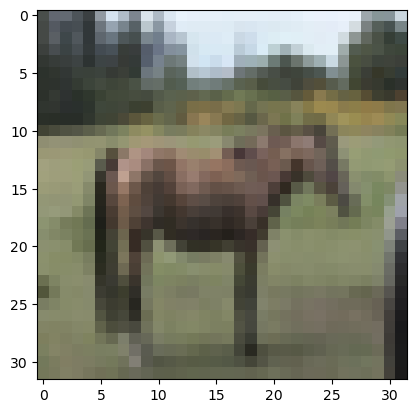

In [7]:
# Show last Image of Test set
plt.imshow(X_test[-1])

# Build the Model

1. Create Model Object
2. Add Convolutional Layers and Max-Pooling Layers (Conv2d, MaxPool2d)
3. Add Flatten Layer
4. Add first fully connected layer
5. Add output layer (final layer)


## Define the Model Object

In [8]:
# Model Object
model = Sequential()

## Add the First Convulotional Layer
CNN Layer Hyperparameters:
- filters: 32 (Number of outputs in the convultion layer)
- kernel_size = 3  (32 filters/kernels of 3x3; can be a tuple to specify height and width)
- padding: same
- activation: relu
- input_shape: (32,32,3)


In [9]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape= [32,32,3]))

## Adding the Second Convolutional Layer and Max-Pooling Layer
CNN Layer Hyperparameters:
- filters: 32
- kernel_size = 3
- padding: same
- activation: relu

MaxPool Layer Hyperparameters
- pool_size: 2
- strides: 2
- padding: valid


In [10]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

## Add the Third Convolutional Layer
CNN Layer hyperparameters:
- filters: 64 
- kernel_size: 3
- padding: same
- activation: relu

In [11]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

## Add the Fourth Convolutional Layer and Max-Pooling Layer
- filters: 64
- kernel_size: 3
- padding: same
- activation: relu

In [12]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

## Add the Flattening Layer

In [13]:
# No need to add parameters in flatten() as it will use the convolutional parameters
# Preps data to be a one-dimensional input
model.add(Flatten())

## Add the first fully connected layer
Dense Layer hyperparameters:
- units/neurons: 128 (Defines the size output of the Dense Layer)
- activation: relu

In [14]:
model.add(Dense(units=128, activation='relu'))

## Add the Output Layer
Dense Layer hyperparameters:
- units/neurons: 10 (number of classes)
- activation: softmax

In [15]:
model.add(Dense(units=10, activation='softmax'))

## Summary of Model

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

## Compile the Model
- Optimizer: adam
- Loss: Sparse softmax (categorical) crossentropy
- metrics: ['sparce_categorical_accuracy'] for multi-class classification (predicting more than 2 classes)

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

## Train the Model

In [19]:
model.fit(X_train, y_train, epochs=5)


Epoch 1/5


2023-04-19 16:15:51.338139: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 33s 21ms/step - loss: 1.3597 - sparse_categorical_accuracy: 0.5096
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9204 - sparse_categorical_accuracy: 0.6774
Epoch 3/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7417 - sparse_categorical_accuracy: 0.7388
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6214 - sparse_categorical_accuracy: 0.7824
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5240 - sparse_categorical_accuracy: 0.8161


## Evaluate Model

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f' Test Loss: {test_loss}')
print(f' Test Accuracy: {test_accuracy}')

313/313 [==============================] - 2s 8ms/step - loss: 0.8143 - sparse_categorical_accuracy: 0.7283
 Test Loss: 0.8142944574356079
 Test Accuracy: 0.7282999753952026


### Increase Epochs to 10


In [21]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.4347 - sparse_categorical_accuracy: 0.8470
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.3542 - sparse_categorical_accuracy: 0.8754
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2870 - sparse_categorical_accuracy: 0.8979
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.2367 - sparse_categorical_accuracy: 0.9150
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.2011 - sparse_categorical_accuracy: 0.9282
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.1682 - sparse_categorical_accuracy: 0.9401
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.1487 - sparse_categorical_accuracy: 0.9474
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.1319 - sparse_categorical_accuracy: 0.9541
Epoch 9/10
1563/

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f' Test Loss: {test_loss}')
print(f' Test Accuracy: {round(test_accuracy,4)}')

313/313 [==============================] - 2s 6ms/step - loss: 1.6311 - sparse_categorical_accuracy: 0.7244
 Test Loss: 1.6310995817184448
 Test Accuracy: 0.724399983882904


### Increase Epochs to 15

In [23]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.1035 - sparse_categorical_accuracy: 0.9647
Epoch 2/15
1563/1563 [==============================] - 32s 20ms/step - loss: 0.1048 - sparse_categorical_accuracy: 0.9643
Epoch 3/15
1563/1563 [==============================] - 35s 23ms/step - loss: 0.1040 - sparse_categorical_accuracy: 0.9652
Epoch 4/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9676
Epoch 5/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0870 - sparse_categorical_accuracy: 0.9704
Epoch 6/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0968 - sparse_categorical_accuracy: 0.9679
Epoch 7/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0834 - sparse_categorical_accuracy: 0.9725
Epoch 8/15
1563/1563 [==============================] - 32s 20ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0.9720
Epoch 9/15
1563/

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f' Test Loss: {test_loss}')
print(f' Test Accuracy: {round(test_accuracy,4)}')

313/313 [==============================] - 2s 6ms/step - loss: 2.2895 - sparse_categorical_accuracy: 0.7229
 Test Loss: 2.289450168609619
 Test Accuracy: 0.7229


### Change Optimizer to AdaMax

In [27]:
model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 34s 21ms/step - loss: 0.0148 - sparse_categorical_accuracy: 0.9954
Epoch 2/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.0022 - sparse_categorical_accuracy: 0.9997
Epoch 3/15
1563/1563 [==============================] - 36s 23ms/step - loss: 7.7062e-04 - sparse_categorical_accuracy: 1.0000
Epoch 4/15
1563/1563 [==============================] - 37s 23ms/step - loss: 3.5504e-04 - sparse_categorical_accuracy: 1.0000
Epoch 5/15
1563/1563 [==============================] - 37s 23ms/step - loss: 1.2291e-04 - sparse_categorical_accuracy: 1.0000
Epoch 6/15
1563/1563 [==============================] - 37s 23ms/step - loss: 5.0934e-05 - sparse_categorical_accuracy: 1.0000
Epoch 7/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.7490e-05 - sparse_categorical_accuracy: 1.0000
Epoch 8/15
1563/1563 [==============================] - 35s 22ms/step - loss: 6.4332e-06 - sparse_categorical_accuracy:

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f' Test Loss: {test_loss}')
print(f' Test Accuracy: {round(test_accuracy,4)}')

313/313 [==============================] - 2s 7ms/step - loss: 5.2811 - sparse_categorical_accuracy: 0.7520
 Test Loss: 5.281054496765137
 Test Accuracy: 0.752


### Change the Optimizer to Adadelta

In [30]:
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0540e-08 - sparse_categorical_accuracy: 1.0000
Epoch 2/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0540e-08 - sparse_categorical_accuracy: 1.0000
Epoch 3/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0540e-08 - sparse_categorical_accuracy: 1.0000
Epoch 4/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0540e-08 - sparse_categorical_accuracy: 1.0000
Epoch 5/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0540e-08 - sparse_categorical_accuracy: 1.0000
Epoch 6/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0540e-08 - sparse_categorical_accuracy: 1.0000
Epoch 7/15
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0540e-08 - sparse_categorical_accuracy: 1.0000
Epoch 8/15
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0540e-08 - sparse_categorical_a

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f' Test Loss: {test_loss}')
print(f' Test Accuracy: {round(test_accuracy,4)}')

313/313 [==============================] - 2s 7ms/step - loss: 5.2811 - sparse_categorical_accuracy: 0.7520
 Test Loss: 5.2810564041137695
 Test Accuracy: 0.752
